In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
import copy as cp

In [2]:
#config
inputSize = 5
outputSize = 3
batchSize = 10
testSize = 5
epochs = 400
learningRate = 0.01
seed = 123456

In [3]:
#Generation of Dataset
np.random.seed(seed)
inputArray = np.random.uniform(-5,5,(batchSize,inputSize))
weights = np.random.uniform(-5,5,(inputSize,outputSize))
outputArray = np.matmul(inputArray,weights)
inputTest = np.random.uniform(-5,5,(testSize,inputSize))
outputTest = np.matmul(inputTest,weights)

In [4]:
#initialization of NN by other random weights
nnWeights = np.random.uniform(-3,3,(inputSize,outputSize))
deltaweights = np.zeros((inputSize,outputSize))
deltainput = np.zeros((batchSize,inputSize))
deltaoutput = np.zeros((inputSize,outputSize))

In [5]:
#Create tf versions of arrays
np.random.seed(seed)
inputArray_tf = tf.convert_to_tensor(cp.deepcopy(inputArray))
weights_tf = tf.convert_to_tensor(cp.deepcopy(weights))
outputArray_tf = tf.matmul(inputArray_tf,weights_tf)
nnWeights_tf = tf.convert_to_tensor(cp.deepcopy(nnWeights))
deltaweights_tf = tf.convert_to_tensor(deltaweights)
deltainput_tf = tf.convert_to_tensor(deltainput)
deltaoutput_tf = tf.convert_to_tensor(deltaoutput)

In [6]:
#create functions
#Operator example in forward and backward (Mult)
def forwardMult(A,B):
    return np.matmul(A,B) 

def backwardMult(dC,A,B,dA,dB):
    dA += np.matmul(dC,np.matrix.transpose(B))
    dB += np.matmul(np.matrix.transpose(A),dC)
    
#Loss example in forward and backward (RMSE)
def forwardloss(predictedOutput,realOutput):
    if(predictedOutput.shape == realOutput.shape):
        loss = np.mean( 0.5*np.square(predictedOutput - realOutput))       
    else :
        print("Shape of arrays not the same")
    return loss

def backwardloss(predictedOutput,realOutput):
    if(predictedOutput.shape == realOutput.shape):
        deltaOutput = (predictedOutput - realOutput)/predictedOutput.size
    else :
        print("Shape of arrays not the same")
    return deltaOutput

#Optimizer example (SGD)
def updateweights(W,dW,learningRate):
    W -= learningRate * dW

In [7]:
historyTrainNP=[] #Used to record the history of loss
historyTrainTF=[]
i = 1
while i <= epochs:
    with tf.Session() as session:  
        with tf.GradientTape() as tape:
            #Forward pass:
            tape.watch(nnWeights_tf)
            nnOutput = forwardMult(inputArray,nnWeights)
            nnOutput_tf = tf.matmul(inputArray_tf,nnWeights_tf)
            #print(nnOutput)
            #print(nnOutput_tf.eval())
            lossTrain = forwardloss(nnOutput,outputArray)
            lossTF = tf.reduce_mean(0.5*tf.square(nnOutput_tf - outputArray_tf))
            historyTrainNP.append(lossTrain)
            historyTrainTF.append(lossTF.eval())
            #print(lossTrain)
            #print(lossTF.eval())
            tape.watch(lossTF)
            #Print Loss every 50 epochs: 
            if(i%10==0):
                print("Epoch: " + str(i) + " Loss (NP): " + "{0:.3f}".format(lossTrain) + " Loss (TF): " + "{0:.3f}".format(lossTF.eval()))

            #Backpropagate
            deltaoutput = backwardloss(nnOutput,outputArray)
            backwardMult(deltaoutput,inputArray,nnWeights,deltainput,deltaweights)
            deltaweights_tf = tape.gradient(lossTF,nnWeights_tf)

            #Apply optimizer
            #print(deltaweights)
            #print(deltaweights_tf.eval())
            updateweights(nnWeights,deltaweights, learningRate)
            nnWeights_tf -= deltaweights_tf*learningRate
            #Reset deltas 
            deltainput = np.zeros((batchSize,inputSize))
            deltaweights = np.zeros((inputSize,outputSize))
            deltaoutput = np.zeros((inputSize,outputSize))

            #Start new epoch
            i = i+1

Epoch: 10 Loss (NP): 139.093 Loss (TF): 139.093
Epoch: 20 Loss (NP): 72.917 Loss (TF): 72.917
Epoch: 30 Loss (NP): 42.783 Loss (TF): 42.783
Epoch: 40 Loss (NP): 27.811 Loss (TF): 27.811
Epoch: 50 Loss (NP): 19.624 Loss (TF): 19.624
Epoch: 60 Loss (NP): 14.704 Loss (TF): 14.704
Epoch: 70 Loss (NP): 11.493 Loss (TF): 11.493
Epoch: 80 Loss (NP): 9.251 Loss (TF): 9.251
Epoch: 90 Loss (NP): 7.602 Loss (TF): 7.602
Epoch: 100 Loss (NP): 6.339 Loss (TF): 6.339
Epoch: 110 Loss (NP): 5.343 Loss (TF): 5.343
Epoch: 120 Loss (NP): 4.540 Loss (TF): 4.540
Epoch: 130 Loss (NP): 3.881 Loss (TF): 3.881
Epoch: 140 Loss (NP): 3.334 Loss (TF): 3.334
Epoch: 150 Loss (NP): 2.875 Loss (TF): 2.875
Epoch: 160 Loss (NP): 2.487 Loss (TF): 2.487
Epoch: 170 Loss (NP): 2.157 Loss (TF): 2.157
Epoch: 180 Loss (NP): 1.875 Loss (TF): 1.875
Epoch: 190 Loss (NP): 1.632 Loss (TF): 1.632
Epoch: 200 Loss (NP): 1.424 Loss (TF): 1.424
Epoch: 210 Loss (NP): 1.244 Loss (TF): 1.244
Epoch: 220 Loss (NP): 1.088 Loss (TF): 1.088
Epo

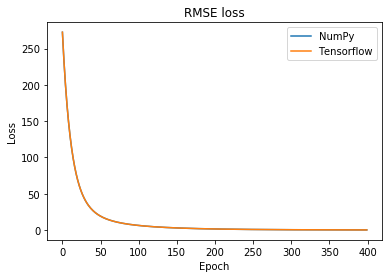

In [8]:
plt.plot(historyTrainNP)
plt.plot(historyTrainTF)
plt.title('RMSE loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['NumPy','Tensorflow'], loc='upper right')
plt.show()